In [18]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

# imshow

In [11]:
img = cv2.imread('lena.png')
cv2.imshow('lenna-img', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [12]:
# to show color image to show channels
#print(img)
print(img.shape)        # h, w, c

(512, 512, 3)


# img_gray

In [12]:
img_gray = cv2.imread('lena.png', 0)
cv2.imshow('lenna-img_gray', img_gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img_gray)

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


In [3]:
print(img_gray.shape)

(512, 512)


In [4]:
print(img_gray.dtype)

uint8


# image crop 图像剪切

In [16]:
# image crop
img_crop = img[300:400, 100:400]
cv2.imshow('img_crop', img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

# color split

In [57]:
#color split
B,G,R=cv2.split(img)

In [36]:
B.shape

(512, 512)

In [19]:
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

# change color

In [52]:
# change color
def random_light_color(img):
    # brightness
    B, G, R = cv2.split(img)

#     b_rand = random.randint(-50, 50)
#     if b_rand == 0:
#         pass
#     elif b_rand > 0:
#         lim = 255 - b_rand
#         B[B > lim] = 255
#         B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
#     elif b_rand < 0:
#         lim = 0 - b_rand
#         B[B < lim] = 0
#         B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)

    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)

#     r_rand = random.randint(-50, 50)
#     if r_rand == 0:
#         pass
#     elif r_rand > 0:
#         lim = 255 - r_rand
#         R[R > lim] = 255
#         R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
#     elif r_rand < 0:
#         lim = 0 - r_rand
#         R[R < lim] = 0
#         R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)

    img_merge = cv2.merge((B, G, R))
    #img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img_merge

In [54]:
img_random_color = random_light_color(img)
cv2.imshow('img_random_color', img_random_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [24]:
B.shape

(512, 512)

In [25]:
B

array([[125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       ...,
       [ 60,  60,  58, ...,  84,  76,  79],
       [ 57,  57,  62, ...,  79,  81,  81],
       [ 57,  57,  62, ...,  79,  81,  81]], dtype=uint8)

In [58]:
b_rand=50
lim=205
B_lim=B
B_lim[B_lim <= lim] = (b_rand + B_lim[B_lim <= lim]).astype(img.dtype)

In [59]:
B_lim

array([[175, 175, 183, ..., 172, 160, 140],
       [175, 175, 183, ..., 172, 160, 140],
       [175, 175, 183, ..., 172, 160, 140],
       ...,
       [110, 110, 108, ..., 134, 126, 129],
       [107, 107, 112, ..., 129, 131, 131],
       [107, 107, 112, ..., 129, 131, 131]], dtype=uint8)

In [60]:
cv2.imshow('B_lim', B_lim)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

# gamma correction

In [5]:
# gamma correction
img_dark = cv2.imread('lena.png')
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)
img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [ ]:
invGamma = 1.0/2
table = []
for i in range(256):
    table.append(((i / 255.0) ** invGamma) * 255)
table = np.array(table).astype("uint8")
print(table)

# img hist 获取直方图

In [6]:
hist= cv2.calcHist(img, #计算图像的直方图
    [0], #使用的通道
    None, #没有使用mask
    [256], #it is a 1D histogram
    [0.0,255.0])


In [7]:
hist.dtype

dtype('float32')

In [8]:
hist.shape

(256, 1)

In [68]:
hist.sum()

512.0

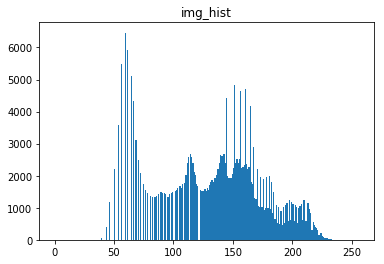

In [67]:
plt.hist(img_gray.flatten(),256,[0,256])
plt.title('img_hist')
plt.show()

In [18]:
x=np.arange(0,256,1)
y=hist.flatten()

In [22]:
y.shape

(256,)

In [27]:
np.ndim(y)

1

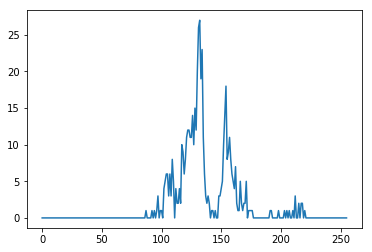

In [28]:
plt.plot(x,y,label='hist')

# imgStretch 增加对比度

In [59]:
def imgStretch(img):
    hist= cv2.calcHist(img, #计算图像的直方图
        [0], #使用的通道
        None, #没有使用mask
        [256], #it is a 1D histogram
        [0.0,255.0])
    minBinNo, maxBinNo = 0, 255

    #计算从左起第一个不为0的直方图位置
    for binNo, binValue in enumerate(hist):
        if binValue != 0:
            minBinNo = binNo
            break
    #计算从右起第一个不为0的直方图位置
    for binNo, binValue in enumerate(reversed(hist)):
        if binValue != 0:
            maxBinNo = 255-binNo
            break
    print('minBinNo=%d  maxBinNo=%d'%(minBinNo, maxBinNo))

    #生成查找表，方法来自参考文献1第四章第2节
    lut = np.zeros(256, dtype = img.dtype )
    for i in range(256):
        if i < minBinNo:        
            lut[i] = 0
        elif i > maxBinNo:
            lut[i] = 255
        else:
            lut[i] = int(255.0*(i-minBinNo)/(maxBinNo-minBinNo)+0.5)
    return cv2.LUT(img,lut)
# print(lut)

In [61]:
img_test=cv2.imread('test1.jpg',0)
img_stretch=imgStretch(img_test)
cv2.imshow('test1',img_test)
cv2.imshow('test1_stretch',img_stretch)
cv2.imwrite('test1_stretch.jpg',img_stretch)
cv2.waitKey(0)
cv2.destroyAllWindows()

minBinNo=115  maxBinNo=213


In [62]:
img_stretch=imgStretch(img)
cv2.imshow('img',img)
cv2.imshow('img_stretch',img_stretch)
cv2.waitKey(0)
cv2.destroyAllWindows()

minBinNo=87  maxBinNo=220


# histogram

In [6]:
img_dark = cv2.imread('lena.png')
cv2.imshow('img_dark', img_dark)
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)
img_brighter = adjust_gamma(img_dark, 2)

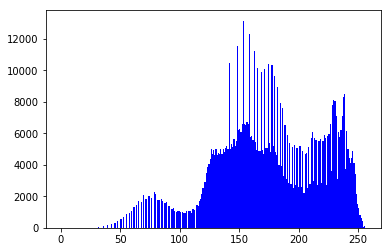

In [8]:
################################
# histogram
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'b')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance(������), u&v: ɫ�ȱ��Ͷ�
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
img_small_brighter = cv2.resize(img_brighter, 
                                (int(img_brighter.shape[0]*0.5), 
                                 int(img_brighter.shape[1]*0.5)))

In [10]:
img_small_brighter.shape

(256, 256, 3)

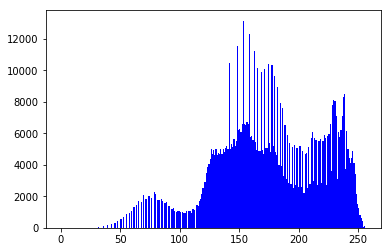

In [12]:
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'b')
plt.show()

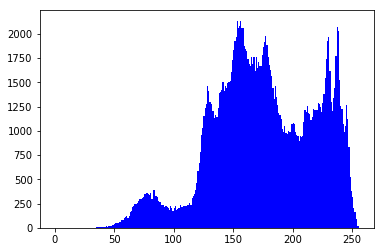

In [13]:
plt.hist(img_small_brighter.flatten(), 256, [0, 256], color = 'b')
plt.show()

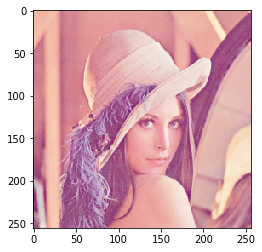

In [24]:
b,g,r=cv2.split(img_small_brighter)
img_small_brighter2=cv2.merge([r,g,b])
plt.imshow(img_small_brighter2)
plt.show()

In [73]:
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
print(img_yuv.shape)
cv2.imshow('img_small_brighter',img_small_brighter)
cv2.imshow('img_yuv',img_yuv)
cv2.waitKey(0)
cv2.destroyAllWindows()

(256, 256, 3)


In [74]:
img_yuv_equalize=img_yuv
img_yuv_equalize[:,:,0]=cv2.equalizeHist(img_yuv[:,:,0])
print(img_yuv[:,:,0])
print(img_yuv_equalize[:,:,0])

[[202 202 196 ... 212 214 155]
 [202 202 196 ... 212 214 155]
 [204 196 199 ... 196 174 102]
 ...
 [ 25  25  30 ...  57  69  68]
 [ 11  22  24 ...  69  85  75]
 [ 11  30  24 ...  85  85  93]]
[[202 202 196 ... 212 214 155]
 [202 202 196 ... 212 214 155]
 [204 196 199 ... 196 174 102]
 ...
 [ 25  25  30 ...  57  69  68]
 [ 11  22  24 ...  69  85  75]
 [ 11  30  24 ...  85  85  93]]


In [33]:
img_yuv[:,:,0].shape

(256, 256)

In [51]:
print(img_small_brighter[0][5])
print(img_brighter[0][10])
print(img_brighter[0][11])

[177 185 240]
[179 185 241]
[175 184 239]


In [48]:
print(img_brighter[0])

[[178 186 240]
 [178 186 240]
 [184 186 238]
 ...
 [176 194 242]
 [167 182 237]
 [151 158 225]]


# img resize

In [67]:
img=cv2.imread('lena.png')
img_divide4=cv2.resize(img,(int(img.shape[0]*0.4),int(img.shape[1]*0.8)))
cv2.imshow('img_divide4',img_divide4)
key=cv2.waitKey(0)
if key==27:
    cv2.destroyAllWindows()

In [60]:
int(img.shape[1]*0.8)

409

# rotation

In [94]:
##############################
# rotation
M = cv2.getRotationMatrix2D((img.shape[0] / 2, img.shape[1] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[0], img.shape[1]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]


In [81]:
M.shape

(2, 3)

In [95]:
# set 
M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (int(img.shape[1]),int(img.shape[0])))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
# explain translation

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


In [96]:
# scale+rotation+translation = similarity transform
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[  0.4330127    0.25        81.14874832]
 [ -0.25         0.4330127  209.14874832]]


In [102]:
##############################
# Affine Transform
rows, cols, ch = img.shape
print(rows, cols, ch )
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.5], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
print(pts1)
print(pts2)
M = cv2.getAffineTransform(pts1, pts2)
print(M)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

512 512 3
[[  0.   0.]
 [511.   0.]
 [  0. 511.]]
[[102.4 256. ]
 [460.8 102.4]
 [ 51.2 460.8]]
[[ 7.01369836e-01 -1.00195696e-01  1.02400002e+02]
 [-3.00587081e-01  4.00782755e-01  2.56000000e+02]]


In [104]:
###########################
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
print(M_warp)
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
	

[[ 7.74175854e-01 -1.33644266e-01  7.48480422e+01]
 [-1.91990871e-03  7.50674552e-01  2.56951684e+01]
 [-1.16352672e-04 -2.93601138e-04  1.00000000e+00]]


In [105]:
M_warp.shape

(3, 3)